In [33]:
import pandas as pd

In [34]:
df=pd.read_csv("train7.csv")
df.head()

,labels,Description,Text_data
0,__label__1,Buyer beware,"This is a self-published book, and if you want..."
1,__label__1,Don't try to fool us with fake reviews.,It's glaringly obvious that all of the glowing...
2,__label__2,i liked this album more then i thought i would,I heard a song or two and thought same o same ...
3,__label__2,Is this great TV??? You bet it is,Hotel Babylon is not just good TV...it's great...
4,__label__2,Alaska sourdough,REad most of the book while visiting my brothe...


<h3>The below code labels the 1st label as Negative (1 and 2 stars) and 2nd as Positive (4 and 5 stars)<br>3 starts are ignored in the data from the source</h3>

In [35]:
for i in range(len(df)):
  if df['labels'][i]=='__label__1':
    df['labels'][i]='Negative'
  else:
    df['labels'][i]='Positive'

In [36]:
df['labels']

0         Negative
1         Negative
2         Positive
3         Positive
4         Positive
            ...   
399995    Negative
399996    Negative
399997    Positive
399998    Positive
399999    Negative
Name: labels, Length: 400000, dtype: object

<h3>The focus is on Tokenizing all the strings in the dataset</h3>

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
df['Text_data'] = df['Text_data'].apply(nltk.word_tokenize)
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[This, is, a, self-published, book, ,, and, if..."
1,Negative,Don't try to fool us with fake reviews.,"[It, 's, glaringly, obvious, that, all, of, th..."
2,Positive,i liked this album more then i thought i would,"[I, heard, a, song, or, two, and, thought, sam..."
3,Positive,Is this great TV??? You bet it is,"[Hotel, Babylon, is, not, just, good, TV, ...,..."
4,Positive,Alaska sourdough,"[REad, most, of, the, book, while, visiting, m..."


In [39]:
# new_words=[]
# for i in range(len(df)):
#   for j in range(len(df['Text_data'][i])):
#     if df['Text_data'][i][j] not in new_words:
#       new_words.append(df['Text_data'][i][j])
# print(len(new_words))

<h3>Count all the words in the dataset</h3>

In [40]:
sum=0
for i in range(len(df)):
  sum+=len(df['Text_data'][i])
print(sum) 

34078439


<h3>The focus is on removing all the punctuation marks and instead replace them with empty strings</h3>

In [41]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [42]:
puntc_list=list(string.punctuation)
print(puntc_list)
print()

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']



In [43]:
import string
def punct_marks(s):
  f=filter(str.isalpha,s)
  s1="".join(f)
  return s1

In [44]:
for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    df['Text_data'][i][j]=punct_marks(df['Text_data'][i][j])
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[This, is, a, selfpublished, book, , and, if, ..."
1,Negative,Don't try to fool us with fake reviews.,"[It, s, glaringly, obvious, that, all, of, the..."
2,Positive,i liked this album more then i thought i would,"[I, heard, a, song, or, two, and, thought, sam..."
3,Positive,Is this great TV??? You bet it is,"[Hotel, Babylon, is, not, just, good, TV, , it..."
4,Positive,Alaska sourdough,"[REad, most, of, the, book, while, visiting, m..."


<h3>Count of all the empty Strings in the dataset</h3>

In [45]:
count=0
for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    if len(df['Text_data'][i][j])==0:
      count+=1
count

4030009

<h3>Function to remove the empty strings after removing punctuation marks</h3>

In [46]:
def remove_items(test_list, item):
 
    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]
 
    return res

In [47]:
for i in range(len(df)):
  df['Text_data'][i]=remove_items(df['Text_data'][i],'')

In [48]:
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[This, is, a, selfpublished, book, and, if, yo..."
1,Negative,Don't try to fool us with fake reviews.,"[It, s, glaringly, obvious, that, all, of, the..."
2,Positive,i liked this album more then i thought i would,"[I, heard, a, song, or, two, and, thought, sam..."
3,Positive,Is this great TV??? You bet it is,"[Hotel, Babylon, is, not, just, good, TV, it, ..."
4,Positive,Alaska sourdough,"[REad, most, of, the, book, while, visiting, m..."


<Axes: xlabel='count', ylabel='labels'>

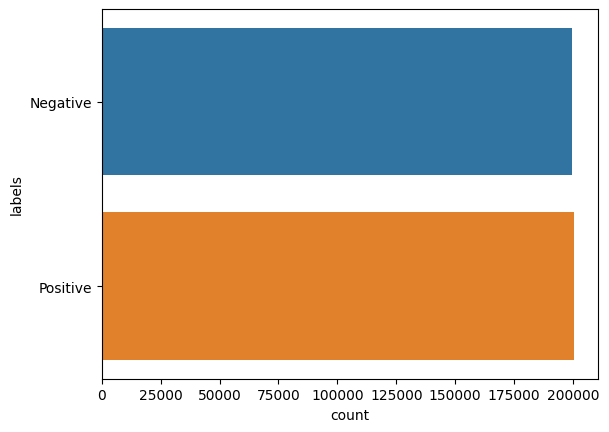

In [49]:
import seaborn as sb
sb.countplot(y=df.labels)

<h3>Remove all the Non-Ascii Characters</h3>

In [50]:
import string
def remove_non_ascii(a_str):
    ascii_chars = set(string.printable)
    return ''.join(filter(lambda x: x in ascii_chars, a_str))

In [51]:
for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    df['Text_data'][i][j].replace(df['Text_data'][i][j],remove_non_ascii(df['Text_data'][i][j]),1)
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[This, is, a, selfpublished, book, and, if, yo..."
1,Negative,Don't try to fool us with fake reviews.,"[It, s, glaringly, obvious, that, all, of, the..."
2,Positive,i liked this album more then i thought i would,"[I, heard, a, song, or, two, and, thought, sam..."
3,Positive,Is this great TV??? You bet it is,"[Hotel, Babylon, is, not, just, good, TV, it, ..."
4,Positive,Alaska sourdough,"[REad, most, of, the, book, while, visiting, m..."


### Convert all the characters to lowercase

In [52]:
def low_case(string1):
  if string1==True or string1==False or string1=='True' or string1=='False':
    return ''
  return string1.lower()

In [53]:
for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    df['Text_data'][i][j]=low_case(df['Text_data'][i][j])
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[this, is, a, selfpublished, book, and, if, yo..."
1,Negative,Don't try to fool us with fake reviews.,"[it, s, glaringly, obvious, that, all, of, the..."
2,Positive,i liked this album more then i thought i would,"[i, heard, a, song, or, two, and, thought, sam..."
3,Positive,Is this great TV??? You bet it is,"[hotel, babylon, is, not, just, good, tv, it, ..."
4,Positive,Alaska sourdough,"[read, most, of, the, book, while, visiting, m..."


<h3>Removing of all stopwords</h3>

In [54]:
count=0
for i in range(len(df)):
    k=len(df['Text_data'][i])
    for j in range(k):
        if j<len(df['Text_data'][i]):
            if len(df['Text_data'][i][j])==1:
                count+=1
                df['Text_data'][i].remove(df['Text_data'][i][j])

In [55]:
# Download the stopwords from NLTK 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(df)):
  k=len(df['Text_data'][i])
  for j in range(k):
    if j<len(df['Text_data'][i]):
      if df['Text_data'][i][j] in stop_words:
        df['Text_data'][i].remove(df['Text_data'][i][j])
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[is, selfpublished, book, if, want, know, read..."
1,Negative,Don't try to fool us with fake reviews.,"[glaringly, obvious, glowing, reviews, been, w..."
2,Positive,i liked this album more then i thought i would,"[heard, song, two, thought, same, when, listen..."
3,Positive,Is this great TV??? You bet it is,"[hotel, babylon, not, good, tv, great, tv, sho..."
4,Positive,Alaska sourdough,"[read, book, visiting, brother, alaska, loved,..."


<h3>Removing all the digits from the Text_data</h3>

In [57]:
from string import digits


for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    remove_digits = str.maketrans('', '', digits)
    res = df['Text_data'][i][j].translate(remove_digits)
    df['Text_data'][i][j]=res
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,"[is, selfpublished, book, if, want, know, read..."
1,Negative,Don't try to fool us with fake reviews.,"[glaringly, obvious, glowing, reviews, been, w..."
2,Positive,i liked this album more then i thought i would,"[heard, song, two, thought, same, when, listen..."
3,Positive,Is this great TV??? You bet it is,"[hotel, babylon, not, good, tv, great, tv, sho..."
4,Positive,Alaska sourdough,"[read, book, visiting, brother, alaska, loved,..."


In [58]:
# from google.colab import files
# files.download("sample1.csv")

<h3>Join all the string for stemming and vectorization</h3>

In [59]:
for i in range(0,len(df)):
  s1=' '.join(df['Text_data'][i])
  df['Text_data'][i]=str(s1)
df.head()

,labels,Description,Text_data
0,Negative,Buyer beware,is selfpublished book if want know read paragr...
1,Negative,Don't try to fool us with fake reviews.,glaringly obvious glowing reviews been written...
2,Positive,i liked this album more then i thought i would,heard song two thought same when listened song...
3,Positive,Is this great TV??? You bet it is,hotel babylon not good tv great tv show featur...
4,Positive,Alaska sourdough,read book visiting brother alaska loved am goi...


In [60]:
len(df['Text_data'][0])
df.head(10)

,labels,Description,Text_data
0,Negative,Buyer beware,is selfpublished book if want know read paragr...
1,Negative,Don't try to fool us with fake reviews.,glaringly obvious glowing reviews been written...
2,Positive,i liked this album more then i thought i would,heard song two thought same when listened song...
3,Positive,Is this great TV??? You bet it is,hotel babylon not good tv great tv show featur...
4,Positive,Alaska sourdough,read book visiting brother alaska loved am goi...
5,Positive,Nice for the money,first one bought defective dvd nt work purchas...
6,Positive,Homer or Moses?,extremely helpful gem complex subject second c...
7,Positive,Rapunzel,is great game my year old son year old daughte...
8,Negative,Very disappointed!,perfume just awful smells nothing like freesia...
9,Positive,"comfy,warm.. but run big",like title says warm comfy run size big nt wea...


In [61]:
df.to_csv('train_combine.csv', index=False)

In [62]:
df1=pd.read_csv('train_combine.csv')
df1.head()

,labels,Description,Text_data
0,Negative,Buyer beware,is selfpublished book if want know read paragr...
1,Negative,Don't try to fool us with fake reviews.,glaringly obvious glowing reviews been written...
2,Positive,i liked this album more then i thought i would,heard song two thought same when listened song...
3,Positive,Is this great TV??? You bet it is,hotel babylon not good tv great tv show featur...
4,Positive,Alaska sourdough,read book visiting brother alaska loved am goi...
